In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as at
import jax.numpy as jnp
import h5py

import loss      as wobble_loss
import simulator as wobble_sim
import model     as wobble_model
import dataset   as wobble_data

import argparse
import os.path as path
import os

import astropy.units as u
import astropy.constants as const

In [2]:
filename  = 'data/sim_hr100000_lr20000_x9.53-9.82_s20.0_e30_sn100_tn100_gn0_y0.0-0.9_v200.0_ep0.0_g1.0_w0.0.h5'

In [3]:
file_tail     = path.split(filename)[1][:-4]

In [5]:
outdir = 'out/jupy'
os.mkdir(outdir)

In [6]:
l = 0
r = 6000
resolving_constant = 40000
iter_1 = 256
iter_2 = 256
model_name      = path.join(outdir,'model{}_l{}_r{}_mI{}_chi_rs{}.pt'.format(file_tail,l,r,iter_1,resolving_constant))
model_tell_name = path.join(outdir,'model{}_l{}_r{}_mI{}_chi_rs{}.pt'.format(file_tail,l,r,iter_2,resolving_constant))

In [7]:
df = h5py.File(filename,"r")
x = np.log(jnp.array(df["samples"]["wavelength"]),dtype=np.float32)
y = np.log(jnp.array(df["samples"]["flux"]),dtype=np.float32)
y_err = jnp.array(np.array(df["samples"]["flux_error"])/np.array(df["samples"]["flux"]),dtype=np.float32)
epoches = np.array(df["constants"]["delta"]).shape
x = np.expand_dims(x,axis=0)
x = np.repeat(x,repeats=epoches,axis=0)

In [8]:
loss = wobble_loss.ChiSquare()

In [10]:
vel_padding = 300*u.km/u.s
x_grid = wobble_model.get_lin_spaced_grid(x[:,l:r],padding=wobble_data.shifts(vel_padding),step=wobble_data.shifts(const.c/resolving_constant))

x_shifts = np.array(df["constants"]["delta"])    

In [11]:
model  = wobble_model.JaxLinear(x_grid,x_shifts)
res, callback = model.optimize(loss,x[:,l:r],y[:,l:r],y_err[:,l:r],iter_1)

5552779000.0
5124642000.0
3956683800.0
3623790800.0
2689812700.0
2163856600.0
1943706500.0
1819268400.0
1527879800.0
1311390100.0
995221500.0
751313500.0
599653250.0
596762940.0
574134000.0
562294900.0
515065200.0
482225150.0
470585630.0
457957630.0
448306700.0
428873860.0
413035780.0
397591000.0
386520930.0
382736580.0
380003700.0
377063000.0
372962720.0
363709900.0
358795800.0
348238530.0
339555700.0
328563620.0
316618020.0
304146460.0
303590140.0
298802050.0
296213470.0
291952450.0
272766720.0
260492370.0
258405870.0
248622370.0
245957520.0
240886380.0
233605810.0
220330270.0
219767540.0
215521230.0
213074260.0
211726900.0
208404350.0
204545700.0
202123200.0
198023580.0
194916600.0
192323630.0
190750880.0
186981500.0
184592030.0
182245380.0
181187630.0
179043460.0
175742160.0
175216260.0
173477600.0
172726880.0
172126420.0
170870600.0
168774930.0
167801890.0
167421340.0
166392770.0
166181890.0
165932380.0
165087300.0
162975700.0
159236930.0
157534460.0
154317920.0
150782500.0
147811

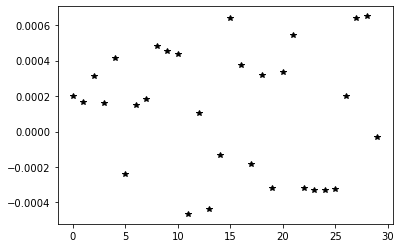

In [19]:
plt.plot(x_shifts,'*k')
plt.show()

In [12]:
theory = df["theory"]
ys_star = np.log(theory['flux_stellar'])
ys_tell = np.log(theory['flux_tellurics'])
ys_gas = np.log(theory['flux_gas'])
xs = np.log(theory['wavelength'])

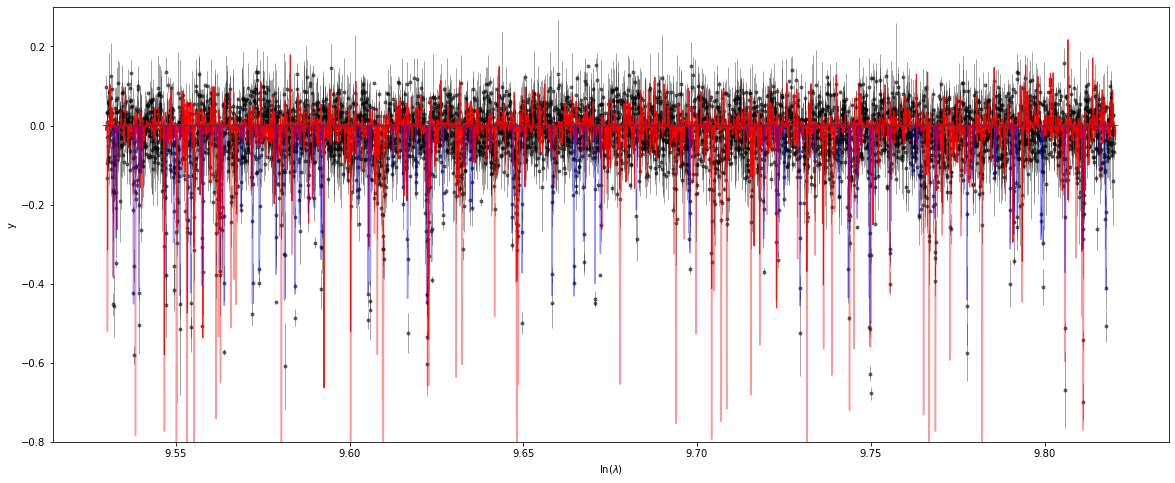

In [18]:
epoch_idx= 14
plt.figure(figsize=(20,8))
plt.xlabel('ln($\lambda$)')
plt.ylabel('y')
plt.errorbar(x[epoch_idx,:],y[epoch_idx,:],y_err[epoch_idx,:],fmt='.k',elinewidth=0.7,zorder=1,alpha=0.5,ms=6)

plt.plot(model.x-model.delta[epoch_idx],model.omega,'r',linestyle='solid',linewidth=1.1,zorder=2,alpha=0.9,ms=6)

plt.plot(xs,ys_star[epoch_idx,:],'r',linestyle='solid',alpha=0.4,ms=6)
plt.plot(xs,ys_tell[epoch_idx,:],'b',linestyle='solid',alpha=0.4,ms=6)
plt.plot(xs,ys_gas[epoch_idx,:],'g',linestyle='solid',alpha=0.4,ms=6)

# plt.xlim(9.65,9.7)
plt.ylim(-0.8,0.3)
plt.show()